In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch


# Limitations of Linear Models

* In linear regression, we assume that the *output* can be computed as a weighted sum of the inputs.

* In softmax regression, we assume that the *score* of each class can be computed as a weighted sum of the inputs.

* However, these are very strong assumptions.


# Feature Extraction

* In order to address some of the limitations of linear models, it is possible to **preprocess** the data so that a linear model becomes appropriate.


## Example

* Consider a regression dataset $(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})$, where each observation $x^{(i)}$ and target $y^{(i)}$ is a real number.

* Suppose that the function $f$ given by $f(x) = 4x^2 + 2x + 1$ is a perfect predictive model, so that $y^{(i)} = f(x^{(i)})$ for every $i$.

* Because $f$ is not a linear function, it may seem that linear regression cannot applied to this regression task.

* However, suppose that each original observation $x$ is transformed by a feature map $\boldsymbol{\phi}$ given by $\boldsymbol{\phi}(x) = [1, x, x^2]^T$ in order to create the preprocessed dataset $(\boldsymbol{\phi}(x^{(1)}), y^{(1)}), (\boldsymbol{\phi}(x^{(2)}), y^{(2)}), \ldots, (\boldsymbol{\phi}(x^{(n)}), y^{(n)})$.

* If $\mathbf{w} = [w_0, w_1, w_2]^T$ denotes the weights of a linear regression model learned from this preprocessed dataset, the prediction of this model for a new observation $x$ transformed into a vector $\boldsymbol{\phi}(x)$ would be given by

$$ \mathbf{w} \cdot \boldsymbol{\phi}(x) = w_0 + w_1 x + w_2 x^2. $$

* Note that this linear model is capable of representing the function $f$ if $\mathbf{w} = [1, 2, 4]^T$.

* In general, linear regression can find the parameters of a degree $k$ polynomial once the original observations are mapped into a $(k+1)$-dimensional space.

* We have used our knowledge about the degree of the underlying polynomial to solve this task. Instead, we could have fit a different linear model for different degrees and compared their performance (on a validation set).

* This technique becomes cumbersome if the original observations are not low-dimensional.


# Limitations of Feature Extraction

* Feature extraction often requires significant domain knowledge.


## Example

* Consider a classification dataset $(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})$, where each observation $\mathbf{x}^{(i)}$ corresponds to a (flattened) image and each target $y^{(i)}$ is zero if the image contains a cat and one if the image contains a dog.

* It is not clear how each flattened image can be transformed by a feature map $\boldsymbol{\phi}$ in a way that allows a linear model to predict the score for each of the classes.

* Much of the early work in the field of *computer vision* was focused on detecting *features* in images.

* Using the previous example, detecting a long snout in an image can serve as evidence that the image contains a dog instead of a cat. Therefore, a linear model could be given this and other features instead of *raw* images.

* One of the major strengths of neural networks is their ability to *learn* how extract features if their architecture is appropriately arranged.

# Composing Linear Models

* Composing linear models may seem like a natural solution to the problem of developing more powerful models, which would be able to predict outputs (or scores) that cannot be computed as a weighted sum of the inputs.

* Concretely, consider a dataset $(\mathbf{x}^{(1)}, \mathbf{y}^{(1)}), (\mathbf{x}^{(2)}, \mathbf{y}^{(2)}), \ldots, (\mathbf{x}^{(n)}, \mathbf{y}^{(n)})$, where each observation $\mathbf{x}^{(i)}$ is a $d$-dimensional vector and each target $\mathbf{y}^{(i)}$ is a $q$-dimensional vector.

* Let $\mathbf{X} \in \mathbb{R}^{n \times d}$ denote a design matrix, where each observation corresponds to a row, and $\mathbf{Y} \in \mathbb{R}^{n \times q}$ denote a target matrix, where each target corresponds to a row.

* For some hyperparameter $h$, consider a weight matrix $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and a bias vector $\mathbf{b}^{(1)} \in \mathbb{R}^{h \times 1}$ that are used to obtain a *feature matrix* $\mathbf{H} \in \mathbb{R}^{n \times h}$ given by

$$ \mathbf{H} = \mathbf{X}\mathbf{W}^{(1)} + \mathbf{B}^{(1)},$$
where $\mathbf{B}^{(1)} \in \mathbb{R}^{n \times h}$ is a matrix given by transposing and replicating $\mathbf{b}^{(1)}$ across $n$ rows.

* Next, consider a weight matrix $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and a bias vector $\mathbf{b}^{(1)} \in \mathbb{R}^{q \times 1}$ that are used to obtain an output matrix $\mathbf{O} \in \mathbb{R}^{n \times q}$ given by

$$ \mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{B}^{(2)},$$
where $\mathbf{B}^{(2)} \in \mathbb{R}^{n \times q}$ is a matrix given by transposing and replicating $\mathbf{b}^{(2)}$ across $n$ rows.

* The $i$-th row of the output matrix $\mathbf{O}$ contains the (transposed) *output vector* that corresponds to the prediction for the $i$-th row of the design matrix $\mathbf{X}$.

* Therefore, it is natural to minimize the discrepancy between the output matrix $\mathbf{O}$ and target matrix $\mathbf{Y}$, which can be measured by a loss function.

* The $i$-th row of the feature matrix $\mathbf{H}$ contains the (transposed) *feature vector* that corresponds to the $i$-th row of the design matrix $\mathbf{X}$. Each element of this feature vector can be interpreted as a *feature* that the model *learns* to detect, since the model is forced to rely on the feature vector to compute the output vector.

* This two *layer* model (named after the two stages of computation required to compute the output based on the input) can be represented by the following diagram (for $d = 4$, $h = 5$, and $q = 3$)

![Multi-layer Perceptron](https://drive.google.com/uc?export=view&id=1NPkMIXfAp_JUKUGbElKXPKiXjk1JtXpW)

* The $(i,j)$-th element of the weight matrix $\mathbf{W}^{(1)}$ contains the weight of the connection between the $j$-th element of the *hidden vector* $\mathbf{h}$ and the $i$-th element of the input vector $\mathbf{x}$.

* The $(i,j)$-th element of the weight matrix $\mathbf{W}^{(2)}$ contains the weight of the connection between the $j$-th element of the *output vector* $\mathbf{o}$ and the $i$-th element of the hidden vector $\mathbf{h}$.

* Each element of the input/hidden/output vector is also called an input/hidden/output unit. For this reason, the number of columns in $\mathbf{H}$ defines the *number of hidden units*, which is a hyperparameter.

# Composing Linear Models is Useless

* As already mentioned, composing linear models may seem like a natural solution to the problem of developing more powerful models, which would be able to predict outputs (or scores) that cannot be computed as a weighted sum of the inputs.

* However, a multi-layer linear model is always equivalent to some one-layer linear model. The proof for a two-layer model is presented below, and can be generalized by induction.

* Using the notation in the previous section and right-distributivity:

$$ \mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{B}^{(2)} = (\mathbf{X}\mathbf{W}^{(1)} + \mathbf{B}^{(1)})\mathbf{W}^{(2)} + \mathbf{B}^{(2)} = \mathbf{X}\mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{B}^{(1)}\mathbf{W}^{(2)} +\mathbf{B}^{(2)} $$

* If we let $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{B} = \mathbf{B}^{(1)}\mathbf{W}^{(2)} +\mathbf{B}^{(2)}$, then $\mathbf{W} \in \mathbb{R}^{d \times q}$ and $\mathbf{B} \in \mathbb{R}^{n \times q}$ and

$$ \mathbf{O} = \mathbf{X}\mathbf{W} + \mathbf{B},$$

so that the output matrix $\mathbf{O} \in \mathbb{R}^{n \times q}$ could have been computed by a linear model defined by $\mathbf{W}$ and $\mathbf{B}$.

# Multi-layer perceptrons

* Although composing linear models is useless, a small change to this simple idea results in the first recognizable neural network that we will cover.

* Let $\sigma : \mathbb{R} \to \mathbb{R}$ be a so-called activation function, a (typically) non-linear function that maps real numbers to real numbers.

* Suppose that we redefine the matrix $\mathbf{H} \in \mathbb{R}^{n \times h}$ so that
$$\mathbf{H} = \sigma(\mathbf{X}\mathbf{W}^{(1)} + \mathbf{B}^{(1)}),$$
where the activation function $\sigma$ is (typically) applied elementwise.

* As before, we may define the output matrix by $\mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{B}^{(2)}.$

* In the presence of a non-linear activation function, it is not generally possible to *collapse* this two-layer model into a one-layer linear model.

* The model we have just defined is a **multilayer perceptron**, the most traditional neural network model.

* This multilayer perceptron has one so-called hidden layer (between the input layer and the output layer), which makes it *shallow*.

* In order to define more powerful multilayer perceptrons, it is possible to *stack* many hidden layers. For instance, we could have a model with $l-1$ hidden layers given by
$$
\begin{aligned}
\mathbf{H}^{(1)} &= \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)}) \\
\mathbf{H}^{(2)} &= \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{B}^{(2)}) \\
\vdots \\
\mathbf{H}^{(l-1)} &= \sigma_{l-1}(\mathbf{H}^{(l-2)}  \mathbf{W}^{(l-1)} + \mathbf{B}^{(l-1)}) \\
\mathbf{O} &= \sigma_{l}(\mathbf{H}^{(l-1)}\mathbf{W}^{(l)} + \mathbf{B}^{(l)}),
\end{aligned}
$$
where each layer $k$ has its own weight matrix $\mathbf{W}^{(k)}$ and bias vector $\mathbf{b}^{(k)}$ (that is transposed and replicated across $n$ rows to obtain $\mathbf{B}^{(k)}$). In multilayer perceptrons, the activation function for all hidden layers is typically the same, but the activation function for the last layer typically depends on the task.

* A deep neural network is a neural network with more than one hidden layer. This is the origin of the term **deep learning**.

# Universal Approximation Theorems

* A sufficiently deep (number of layers) or wide (number of hidden units) neural network can *approximate* most functions of interest.

* There are different ways to formalize this statement. They are all called universal approximation theorems.

* In other words, most functions of interest can be approximated by finding the right weights for a deep neural network.

* These theorems are potentially misleading, since finding the right weights may be impossibly hard.

# Common Activation Functions

* The units in a multi-layer perceptron are also called (artificial) neurons.

* This is an analogy that relies on intepreting a biological neuron as a unit that combines its inputs to produce an output. If the brain is then reduced to a network of biological neurons, it becomes analogous to an artificial neural network. This is a gross but sometimes useful oversimplification of biology!

* The term activation function comes from interpreting them as functions that decide whether a neuron is *activated* (producing a non-zero output).

* Activation functions are typically (almost everywhere) differentiable functions, in order to allow computing gradients of losses with respect to weights and biases.

* The choice of activation function impacts learning efficiency greatly due to its impact on gradients.

* Many activation functions have been used over the history of neural networks.

* The popularity of activation functions is mostly determined by empirical performance and computational efficiency.


## ReLU Function

* The rectified linear unit function ($\text{ReLU}$) is currently the most popular choice of activation function.

* The ReLU is defined by
$$ \text{ReLU}(x) = \max (x, 0).$$

* The ReLU maps negative numbers to zero and non-negative numbers are left unchanged.

* Note that if $\text{ReLU}$ is used in the output layer, predicting negative values becomes impossible. This is why the output layer often has its own activation function.

* The derivative of $\text{ReLU}(x)$ is $0$ when $x < 0$ and $1$ when $x>0$. Note that $\text{ReLU}$ is not differentiable at $x=0$.

* The derivative of $\text{ReLU}$ is the reason for its success. It mitigates the *vanishing gradients* issue that we will discuss soon.

* The following code plots $\text{ReLU}$ and its derivative $\text{ReLU}'$.

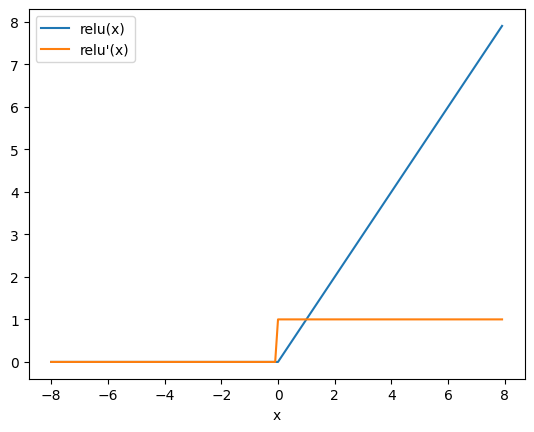

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) # Creates a vector of points in the range [-8, 8] spaced 0.1 units apart.
y = torch.relu(x) # Applies `relu` elementwise to `x`

# Because `y` is a vector, `backward` requires a vector to compute a so-called Jacobian product. Understanding this step is optional:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#optional-reading-tensor-gradients-and-jacobian-products
y.backward(torch.ones(x.size()))

plt.plot(x.detach(), y.detach(), label='relu(x)')
plt.plot(x.detach(), x.grad, label='relu\'(x)')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()


## Sigmoid Function

* The sigmoid function used to be the most popular choice of activation function. It is still indispensable in some architectures that we will study.

* The sigmoid function is defined by

$$ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}}, $$

where $e \approx 2.71828$ is Euler's number.

* The sigmoid function maps a real number to a number in the range $(0,1)$. Very negative numbers are mapped close to zero, and very positive numbers are mapped close to one. Zero is mapped to $1/2$.

* This is one of the simplest differentiable functions that can model an artificial neuron that gradually switches between being inactive (output close to zero) and active (output close to one) based on its *weighted input*.

* The derivative of $\text{sigmoid}(x)$ is close to zero when $x$ is very negative or very positive. This means that small changes in such $x$ will lead to small changes in $\text{sigmoid}(x)$.

* This is a significant issue, since gradient descent ultimately relies on tracking the effects of changing the parameters on the loss, which is mediated by changes in activations.

* A loss that is barely affected by small changes in parameters characterizes the so-called vanishing gradients problem.

* The vanishing gradients problem is one of the greatest challenges in training deep neural networks.

* Note that $\text{ReLU}$ mitigates this issue when $x > 0$, but not when $x < 0$.

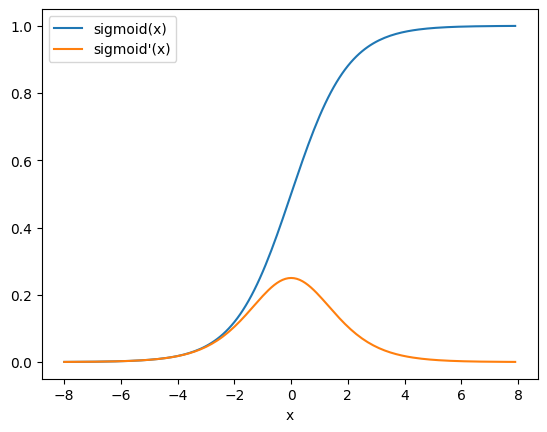

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) # Creates a vector of points in the range [-8, 8] spaced 0.1 units apart.
y = torch.sigmoid(x) # Applies `sigmoid` elementwise to `x`

# Because `y` is a vector, `backward` requires a vector to compute a so-called Jacobian product. Understanding this step is optional:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#optional-reading-tensor-gradients-and-jacobian-products
y.backward(torch.ones(x.size()))

plt.plot(x.detach(), y.detach(), label='sigmoid(x)')
plt.plot(x.detach(), x.grad, label='sigmoid\'(x)')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

## Tanh Function

* The hyperbolic tangent function $\text{tanh}$ used to be the second most popular choice of activation function.

* The $\text{tanh}$ function is defined by

$$ \text{tanh}(x) = \frac{e^{2x} - 1}{e^{2x} + 1},$$
where $e \approx 2.71828$ is Euler's number.

* The $\text{tanh}$ function maps a real number to a number in the range $(-1,1)$. Very negative numbers are mapped close to $-1$, and very positive numbers are mapped close to $1$. Zero is mapped to zero.

* The hyperbolic tangent function serves a similar purpose as the sigmoid function. The most significant difference is their output range.

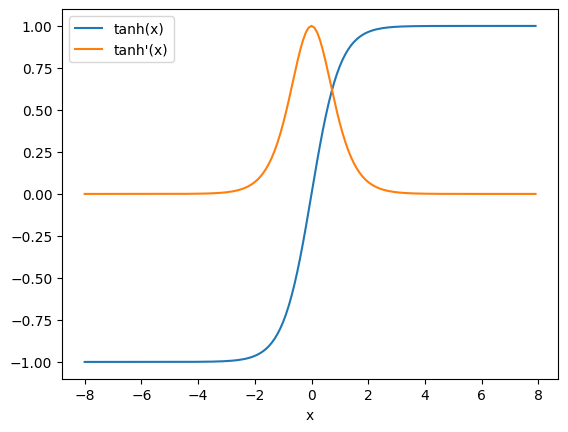

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) # Creates a vector of points in the range [-8, 8] spaced 0.1 units apart.
y = torch.tanh(x) # Applies `tanh` elementwise to `x`

# Because `y` is a vector, `backward` requires a vector to compute a so-called Jacobian product. Understanding this step is optional:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#optional-reading-tensor-gradients-and-jacobian-products
y.backward(torch.ones(x.size()))

plt.plot(x.detach(), y.detach(), label='tanh(x)')
plt.plot(x.detach(), x.grad, label='tanh\'(x)')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Recommended reading

* [Dive into Deep Learning](https://d2l.ai): Chapters 5.1, 5.2, and 5.3.

# [Storing this notebook as a `pdf`]

* In order to store this notebook as a pdf, you will need to hide the images included in the previous cells using the following syntax:
    * `<!--- ![Image caption.](https://link.to.image) --->`

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Set the path to this notebook below (add \ before spaces). The output `pdf` will be stored in the corresponding folder.
!jupyter nbconvert --to pdf /content/gdrive/My\ Drive/Colab\ Notebooks/nndl/week_05/lecture/01_Multilayer_Perceptrons.ipynb

# If having issues, save this notebook (File > Save) and restart the session (Runtime > Restart session) before running this cell. To debug, remove the first line (`%%capture`).